In [ ]:
#Import Necessary Packages
import seaborn as sns
import matplotlib.pyplot as plt
import math
import pandas as pd

#Import the dataset
file_path = "/Users/hasanahamed/Library/Mobile Documents/com~apple~CloudDocs/DSCI 303 ML/Python/Project Files/TechWorkersHealth.csv"
data = pd.read_csv(file_path)

KeyboardInterrupt: 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import math
import pandas as pd

file_path = "/content/TechWorkersHealth.csv"
data = pd.read_csv(file_path)

In [ ]:
# Remove columns with too many missing values (over 30%)
df2 = data[[column for column in data if data[column].count() / len(data) >= 0.3]]
print("List of dropped columns:", end=" ")
for c in data.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
data = df2

List of dropped columns: comments, 



In [ ]:
#Data Cleaning

data = data.drop(columns=['Timestamp']) #drop the timestamp variable

#Change qualitiative data to quantitative (code No as 0, Don't Know/Not Sure as 1, and Yes as 2)
#Most of the cases, NA can be filled out from the context of the question, code the NAs according to the question
data['work_interfere'] = data['work_interfere'].fillna('None Listed')
data['anonymity'] = data['anonymity'].fillna(1)
data['self_employed'] = data['self_employed'].fillna(0)
data['state'] = data['state'].fillna('None Listed')
data['no_employees'] = data['no_employees'].fillna('None Listed')
data['Gender'] = data['Gender'].fillna(1)
data
data['self_employed'] = data['self_employed'].map({'Yes': 1, 'No': 0})
data['obs_consequence'] = data['obs_consequence'].map({'Yes': 1, 'No': 0})
data['family_history'] = data['family_history'].map({'Yes': 1, 'No': 0})
data['treatment'] = data['treatment'].map({'Yes': 1, 'No': 0})
data['work_interfere'] = data['work_interfere'].map({'Often':3,'Sometimes':2,'Rarely': 1, 'Never': 0,'None Listed':1.5})
data['remote_work'] = data['remote_work'].map({'Yes': 1, 'No': 0})
data['tech_company'] = data['tech_company'].map({'Yes': 1, 'No': 0})
data['benefits'] = data['benefits'].map({'Yes': 2, 'No': 0, "Don't know":1})
data['care_options'] = data['care_options'].map({'Yes': 2, 'No': 0, 'Not sure':1})
data['wellness_program'] = data['wellness_program'].map({'Yes': 2, 'No': 0, "Don't know":1})
data['seek_help'] = data['seek_help'].map({'Yes': 2, 'No': 0, "Don't know":1})
data['anonymity'] = data['anonymity'].map({'Yes': 2, 'No': 0, "Don't know":1})
data['leave'] = data['leave'].map({'Very easy': 4,'Somewhat easy':3,"Don't know":2,'Somewhat difficult':1,'Very difficult':0})
data['mental_health_consequence'] = data['mental_health_consequence'].map({'Yes': 2, 'No': 0, "Maybe":1})
data['phys_health_consequence'] = data['phys_health_consequence'].map({'Yes': 2, 'No': 0, "Maybe":1})
data['coworkers'] = data['coworkers'].map({'Yes': 1, 'No': 0, "Some of them":1})
data['supervisor'] = data['supervisor'].map({'Yes': 1, 'No': 0, "Some of them":1})
data['mental_health_interview'] = data['mental_health_interview'].map({'Yes': 1, 'No': 0, "Maybe":1})
data['phys_health_interview'] = data['phys_health_interview'].map({'Yes': 1, 'No': 0, "Maybe":1})
data['mental_vs_physical'] = data['mental_vs_physical'].map({'Yes': 2, 'No': 0, "Don't know":1})
data['no_employees'] = data['no_employees'].map({'More than 1000': 4,"100-500":3,'26-100':2,'6-25':1,'1-5':0})
data['Gender'] = data['Gender'].map({'M':0,'Male':0,'male':0,'Maile':0, 'Cis Male':0,'m':0,
                                           'Male (CIS)':0,'Male ':0,'Man':0,'msle':0,'cis male':0,'Male-ish':1,
                                           'Trans-female':1,'queer/she/they':1,'non-binary':1,'None listed':1, 'Genderqueer':1,
                                           'Trans woman':1,'Female (trans)':1,'p':1, 'Female':2,'female':2,
                                           'Cis Female':2,'F':2,'f':2,'woman':2,'Female ':2,'cis-feamle/femme':2,'Female (cis)':2,'femail':2})
#Removing observations with age higher than 100 and less than 0
data = data[data['Age'] < 100]
data = data[data['Age'] > 0]


In [ ]:
#Filter the US data (remove all the other countries)
data_us = data[data['Country'] == 'United States']
data_us = data.drop(columns=['Country'])

#dividing the dataset into three sets for the analysis
df_num_us1 = data_us[['Age', 'state', 'Gender', 'self_employed', 'family_history', 'remote_work',
                      'benefits', 'care_options','wellness_program','leave', 'mental_health_consequence', 'coworkers', 'supervisor']]
df_num_us2 = data_us[['treatment','Age', 'Gender', 'self_employed', 'family_history', 'remote_work',
                      'care_options','wellness_program', 'coworkers', 'supervisor']]
df_num_us3 = data_us[['treatment','Age', 'Gender', 'self_employed', 'family_history', 'remote_work',
                      'benefits', 'care_options','wellness_program','leave', 'mental_health_consequence', 'coworkers', 'supervisor']]
df_num_us = data_us.select_dtypes(include = 'number')
df_num_us.head()

#Primary datasets for analysis (three sets, first including all, 2nd including important variables (theoretically, and finally important variables using correlation)
df_analysis_all = data_us.select_dtypes(include = 'number')
df_analysis_imp = data_us[['treatment','Age', 'Gender', 'self_employed', 'family_history', 'remote_work', 'benefits', 'care_options',
                           'wellness_program','leave', 'mental_health_consequence', 'coworkers', 'supervisor']]
df_analysis_corr = data_us[['treatment', 'Gender', 'work_interfere', 'family_history', 'anonymity', 'care_options',
                            'mental_health_consequence','benefits', 'obs_consequence']]

From now on, for binary or other multiple choice variables, 0=No, largest # = Yes. Intermediate numbers are intermediate answers like "Maybe"

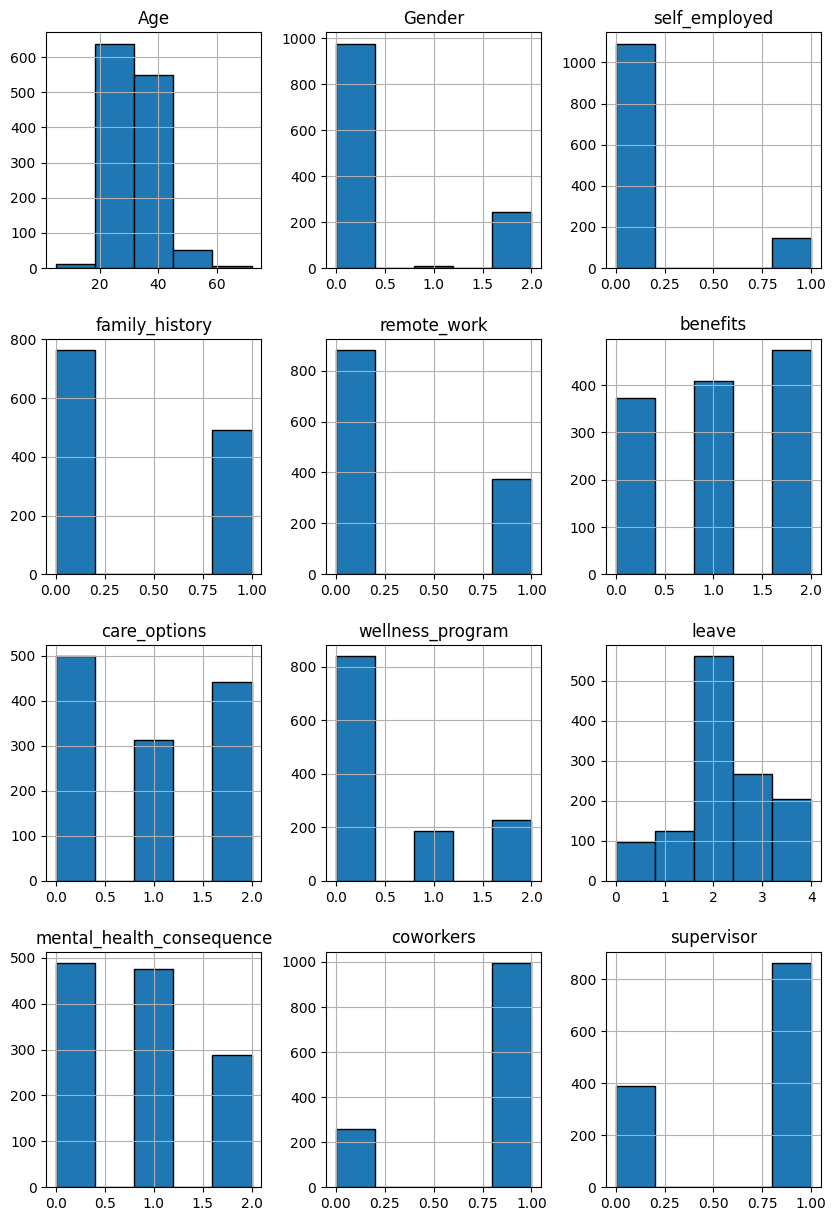

In [ ]:
#Histogram of the X variables
df_num_us1.hist(bins=5,edgecolor='black', align='mid',figsize=(10, 15))
plt.show()

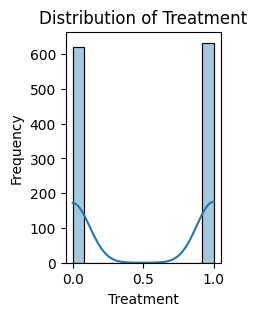

<Figure size 640x480 with 0 Axes>

In [ ]:
#Histogram of the outcome variable
plt.figure(figsize=(2, 3))

sns.histplot(data['treatment'], kde=True, alpha=0.4)
plt.xlabel("Treatment")
plt.ylabel("Frequency")
plt.title("Distribution of Treatment")
plt.show()
plt.savefig("t.png", format='png', dpi=300)

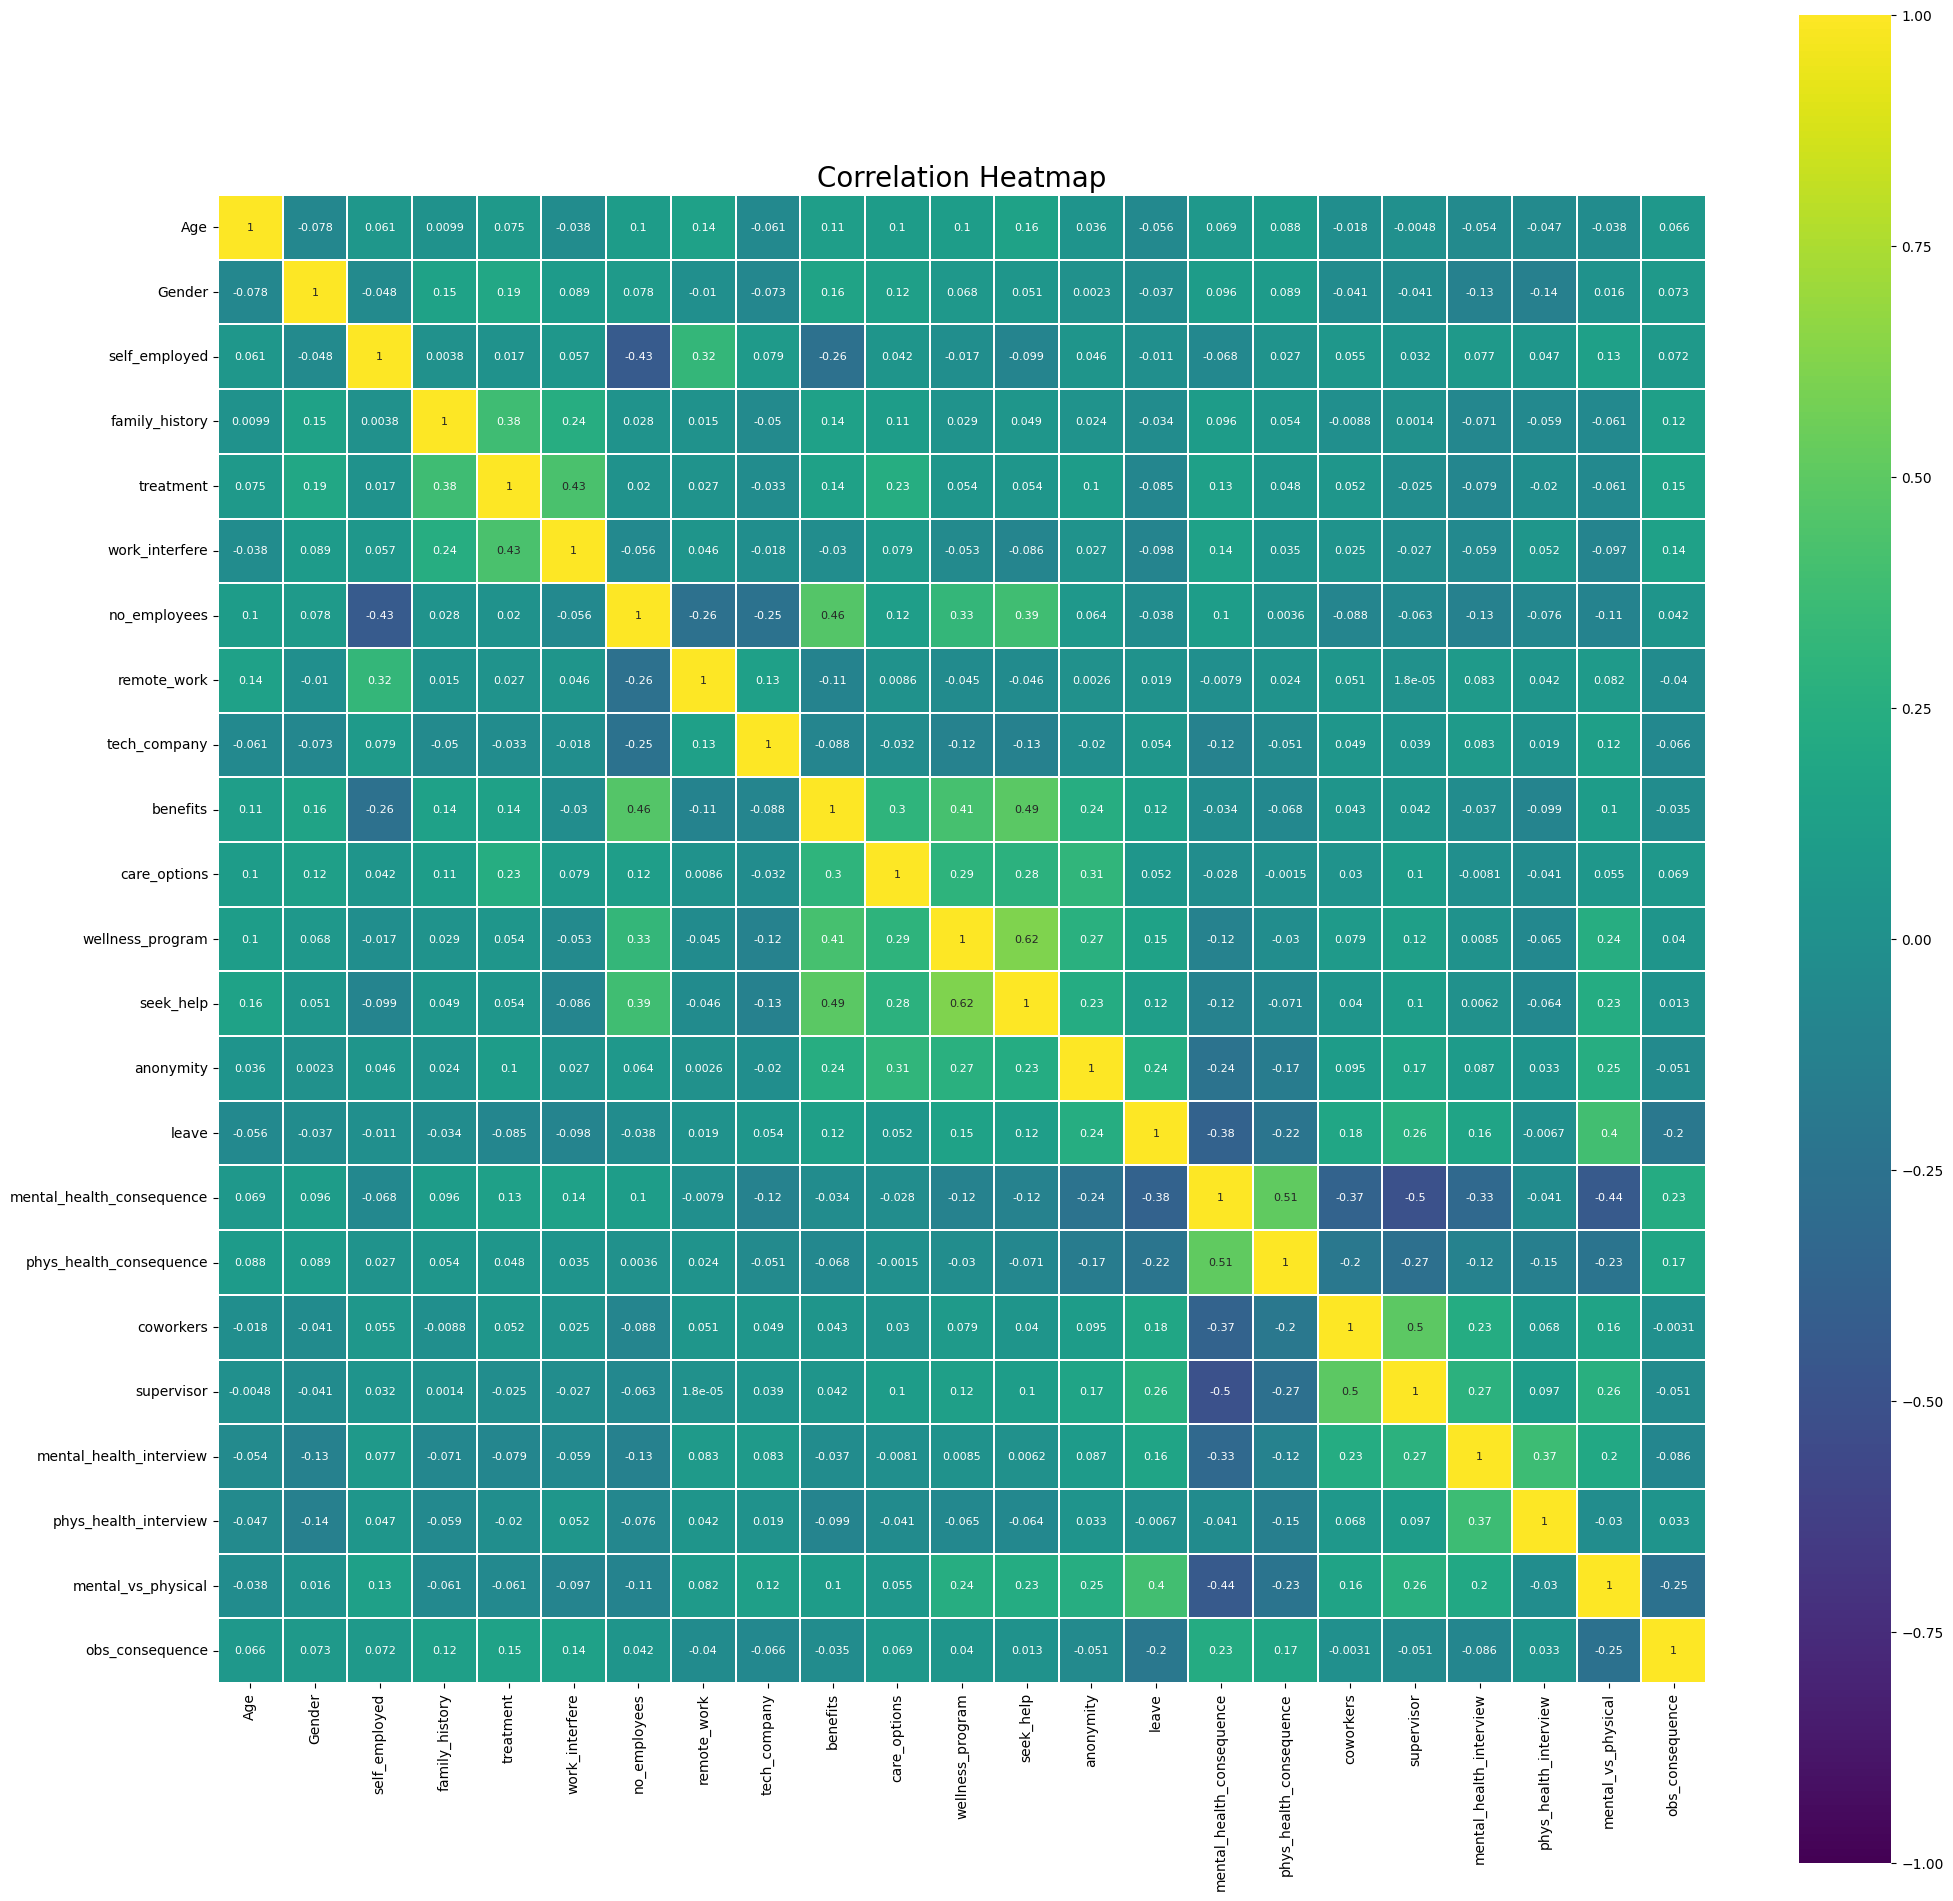

In [ ]:
#Plotting correlation heatmap for all the variables
df_corr = df_num_us.corr(numeric_only = True)
plt.figure(figsize=(24, 24))

sns.heatmap(df_corr,
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.title("Correlation Heatmap", fontsize=20)
plt.savefig("correlation_heatmap.png", format='png', dpi=300, bbox_inches='tight')

In [ ]:
#SVM using all features in the dataset

#Import necessary packages
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# Prepare the data
X = df_analysis_all.drop(columns=['treatment'])  # Features
y = df_analysis_all['treatment']  # Target

# Replace NaN values in the dataset (if any)
X = X.fillna(X.median())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train an SVM model (after tuning the parameters C and gamma to achieve the highest training and test accuracy)
svm_model = SVC(kernel = "rbf", C=1.6, gamma = 0.04, random_state = 0)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_test = svm_model.predict(X_test)
y_pred_train = svm_model.predict(X_train)

# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Test Accuracy: 0.7211155378486056
Train Accuracy: 0.8454636091724825

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72       124
           1       0.72      0.72      0.72       127

    accuracy                           0.72       251
   macro avg       0.72      0.72      0.72       251
weighted avg       0.72      0.72      0.72       251



In [ ]:
#SVM using selected feature (based on theory) in the dataset

# Prepare the data
X = df_analysis_imp.drop(columns=['treatment'])  # Features
y = df_analysis_imp['treatment']  # Target

# Replace NaN values in the dataset (if any) (replacing with the median instead of mean as that makes more sense due to the nature of the data)
X = X.fillna(X.median())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train an SVM model (after tuning the parameters C and gamma to achieve the highest training and test accuracy)
svm_model = SVC(kernel='rbf', C=1.9, gamma = 0.045, random_state=0)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_test = svm_model.predict(X_test)
y_pred_train = svm_model.predict(X_train)

# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Test Accuracy: 0.7051792828685259
Train Accuracy: 0.7567298105682951

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.69      0.70       124
           1       0.71      0.72      0.71       127

    accuracy                           0.71       251
   macro avg       0.71      0.71      0.71       251
weighted avg       0.71      0.71      0.71       251



In [ ]:
#SVM using selected feature (based on correlation) in the dataset

# Prepare the data
X = df_analysis_corr.drop(columns=['treatment'])  # Features
y = df_analysis_corr['treatment']  # Target

# Replace NaN values in the dataset (if any) (replacing with the median instead of mean as that makes more sense due to the nature of the data)
X = X.fillna(X.median())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train an SVM model (after tuning the parameters C and gamma to achieve the highest training and test accuracy)
svm_model = SVC(kernel='rbf', C=83, gamma = 0.04, random_state=0)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_test = svm_model.predict(X_test)
y_pred_train = svm_model.predict(X_train)

# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Test Accuracy: 0.7131474103585658
Train Accuracy: 0.7826520438683948

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.72      0.71       124
           1       0.72      0.71      0.71       127

    accuracy                           0.71       251
   macro avg       0.71      0.71      0.71       251
weighted avg       0.71      0.71      0.71       251



Initial RandomForest Performance:
Test Accuracy: 0.7619047619047619
Train Accuracy: 0.8740499457111836
Precision: 0.7768595041322314
Recall: 0.7704918032786885

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       109
           1       0.78      0.77      0.77       122

    accuracy                           0.76       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.76      0.76      0.76       231



KeyboardInterrupt: 

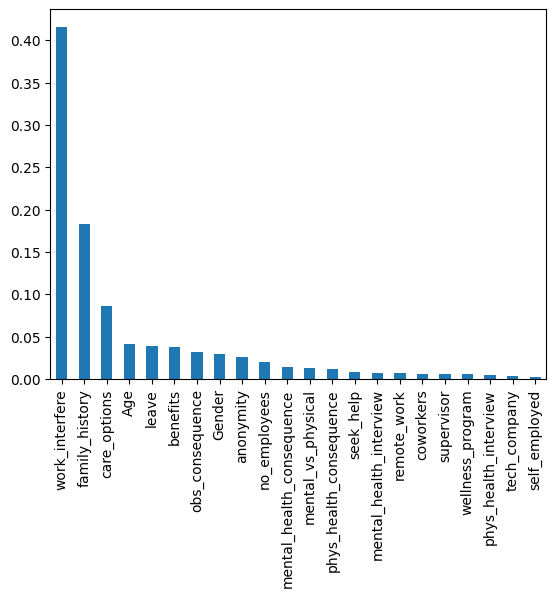

In [ ]:
# TAKES AROUND 5-7 MINS TO RUN
#importing necessary packages
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score, r2_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

#RF using all feature in the dataset
# Prepare the data
X = df_analysis_all.drop(columns=['treatment'])  # Features
y = df_analysis_all['treatment']  # Target

# Replace NaN values in the dataset (if any) (replacing with the median instead of mean as that makes more sense due to the nature of the data)
X = X.fillna(X.median())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#manually optimizing parameters based on accuracy score
# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=0, min_samples_split = 2, max_depth = 6,
                                  min_samples_leaf = 1, bootstrap = False )
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

# Make predictions
y_pred_test = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Initial RandomForest Performance:")

print("Test Accuracy:", accuracy_test)
print("Train Accuracy:", accuracy_train)

print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

feature_importances1 = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances1.plot.bar();

# #--------------------------------------------------
#Trying to optimize parameters
param_dist = {'n_estimators': range(15),
              'max_depth': range(10),
              'min_samples_split': range(5),
              'min_samples_leaf': range(5),
              'bootstrap': [True, False]}

rf = RandomForestClassifier()
# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(rf,param_grid = param_dist,cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  grid_search.best_params_)
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

y_pred_test = grid_search.predict(X_test)
y_pred_train = grid_search.predict(X_train)

accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("\nOptimized RandomForest Performance:")

print("Test Accuracy:", accuracy_test)
print("Train Accuracy:", accuracy_train)


precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)

print("Precision:", precision)
print("Recall:", recall)


In [ ]:
# #RF using selected feature (based on theory) in the dataset

# # Prepare the data
X = df_analysis_imp.drop(columns=['treatment'])
y = df_analysis_imp['treatment']


# Replace NaN values in the dataset (if any) (replacing with the median instead of mean as that makes more sense due to the nature of the data)
X = X.fillna(X.median())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#manually optimizing parameters based on accuracy score
# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=0, min_samples_split = 2, max_depth = 8,
                                  min_samples_leaf = 1, bootstrap = False )
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

# Make predictions
y_pred_test = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Initial RandomForest Performance:")
print("Test Accuracy:", accuracy_test)
print("Train Accuracy:", accuracy_train)

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

feature_importances1 = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances1.plot.bar();

# #--------------------------------------------------
#Trying to optimize parameters
param_dist = {'n_estimators': range(15),
              'max_depth': range(10),
              'min_samples_split': range(5),
              'min_samples_leaf': range(5),
              'bootstrap': [True, False]}

rf = RandomForestClassifier()
# Use random search to find the best hyperparameters
grid_search = GridSearchCV(rf,param_grid = param_dist,cv=5)

# Fit the random search object to the data
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  grid_search.best_params_)
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

y_pred_test = grid_search.predict(X_test)
y_pred_train = grid_search.predict(X_train)

accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("\nOptimized RandomForest Performance:")

print("Test Accuracy:", accuracy_test)
print("Train Accuracy:", accuracy_train)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

NameError: name 'RandomForestClassifier' is not defined

Initial RandomForest Performance:
Train Accuracy: 0.8279022403258656
Test Accuracy: 0.8048780487804879

Classification Report (Initial Test Set):
               precision    recall  f1-score   support

           0       0.81      0.77      0.79       115
           1       0.80      0.84      0.82       131

    accuracy                           0.80       246
   macro avg       0.81      0.80      0.80       246
weighted avg       0.80      0.80      0.80       246


Feature Importances:
work_interfere               0.469421
family_history               0.181963
care_options                 0.106855
Gender                       0.075137
obs_consequence              0.051548
benefits                     0.046639
mental_health_consequence    0.034983
anonymity                    0.033454
dtype: float64


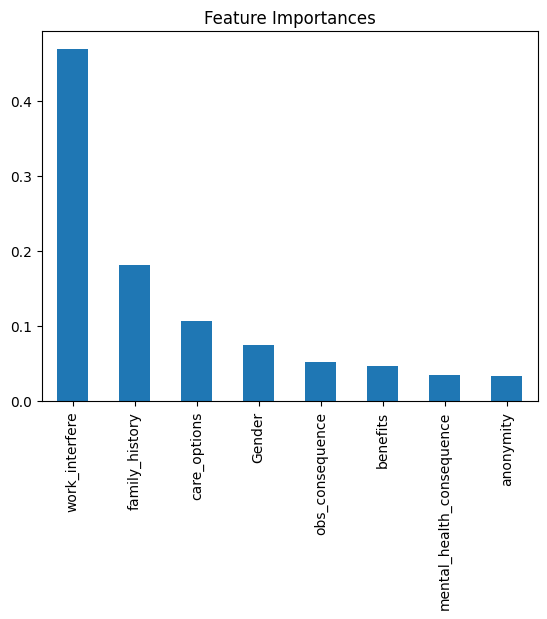

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
22380 fits failed out of a total of 37500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3750 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn


Best Hyperparameters: {'bootstrap': True, 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 8}

Optimized RandomForest Performance:
Test Accuracy (Optimized): 0.8252032520325203
Train Accuracy (Optimized): 0.8126272912423625

Classification Report (Optimized Test Set):
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       115
           1       0.83      0.85      0.84       131

    accuracy                           0.83       246
   macro avg       0.82      0.82      0.82       246
weighted avg       0.83      0.83      0.83       246

Confusion Matrix:
[[ 92  23]
 [ 20 111]]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.78102662 0.78408785 0.7881643 ]
  warnings.warn(


In [ ]:
# #RF using high-corr feature in the dataset
#takes 5-7 mins to run!
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

df_analysis_corr = df_analysis_corr.dropna()
X = df_analysis_corr.drop(columns=['treatment']).values  # Drop non-feature columns
y = df_analysis_corr['treatment'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the rf model with manually-tuned parameters
rf_model = RandomForestClassifier(n_estimators=10,random_state=0,min_samples_split=2,
    max_depth=6, min_samples_leaf=1, bootstrap=False)

rf_model.fit(X_train, y_train)

# Make predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Evaluate performance
print("Initial RandomForest Performance:")
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report (Initial Test Set):\n", classification_report(y_test, y_pred_test))

# Feature importance
feature_importances = pd.Series(rf_model.feature_importances_,
                                index=df_analysis_corr.drop(columns=['treatment']).columns)

print("\nFeature Importances:")
print(feature_importances.sort_values(ascending=False))
feature_importances.sort_values(ascending=False).plot(kind='bar', title="Feature Importances")
plt.show()

#-------------------------------------------------------------------
# Hyperparameter optimization using GridSearchCV
param_grid = {
    'n_estimators': range(15),
    'max_depth': range(10),
    'min_samples_split': range(5),
    'min_samples_leaf': range(5),
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model and hyperparameters
best_rf = grid_search.best_estimator_
print("\nBest Hyperparameters:", grid_search.best_params_)

# Evaluate the optimized model
y_pred_optimized_test = best_rf.predict(X_test)
y_pred_optimized_train = best_rf.predict(X_train)

print("\nOptimized RandomForest Performance:")
print("Test Accuracy (Optimized):", accuracy_score(y_test, y_pred_optimized_test))
print("Train Accuracy (Optimized):", accuracy_score(y_train, y_pred_optimized_train))
print("\nClassification Report (Optimized Test Set):\n", classification_report(y_test, y_pred_optimized_test))

cm = confusion_matrix(y_test, y_pred_optimized_test)
print("Confusion Matrix:")
print(cm)

In [ ]:
# Preparing data to test the models on the UK data
df_analysis_all2 = data.select_dtypes(include = 'number')
df_analysis_all2['Country'] = data['Country']

df_analysis_imp2 = data[['treatment','Age', 'Gender', 'self_employed', 'family_history', 'remote_work', 'benefits', 'care_options',
                           'wellness_program','leave', 'mental_health_consequence', 'coworkers', 'supervisor', 'Country']]
df_analysis_corr2 = data[['treatment', 'Gender', 'work_interfere', 'family_history', 'anonymity', 'care_options','mental_health_consequence','benefits', 'obs_consequence', 'Country']]

#creating test and training datasets (for three sets of variables) based on the countries
df_analysis_all_train = df_analysis_all2[df_analysis_all2['Country'] == 'United States']
df_analysis_all_test = df_analysis_all2[df_analysis_all2['Country'] == 'United Kingdom']

df_analysis_imp_train = df_analysis_imp2[df_analysis_imp2['Country'] == 'United States']
df_analysis_imp_test = df_analysis_imp2[df_analysis_imp2['Country'] == 'United Kingdom']

df_analysis_corr_train = df_analysis_corr2[df_analysis_corr2['Country'] == 'United States']
df_analysis_corr_test = df_analysis_corr2[df_analysis_corr2['Country'] == 'United Kingdom']

#dropping the country variables from all the dataset
df_analysis_all_train  = df_analysis_all_train.drop(columns=['Country'])
df_analysis_all_test   =  df_analysis_all_test.drop(columns=['Country'])
df_analysis_imp_train  = df_analysis_imp_train.drop(columns=['Country'])
df_analysis_imp_test   =  df_analysis_imp_test.drop(columns=['Country'])
df_analysis_corr_train =df_analysis_corr_train.drop(columns=['Country'])
df_analysis_corr_test  = df_analysis_corr_test.drop(columns=['Country'])

In [ ]:
##SVM using all the features (Test on the UK data)
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

#split data into test and train
X_train = df_analysis_all_train.drop(columns=['treatment'])  # Features
y_train = df_analysis_all_train['treatment'].values  # Target
X_test =  df_analysis_all_test.drop(columns=['treatment'])  # Features
y_test =  df_analysis_all_test['treatment'].values  # Target

# Replace NaN values in the dataset (if any) (replacing with the median instead of mean as that makes more sense due to the nature of the data)
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())

# Train an SVM model (after tuning the parameters C and gamma to achieve the highest training and test accuracy)
svm_model = SVC(kernel='rbf', C=.15, gamma = 0.03, random_state=0)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_test = svm_model.predict(X_test)
y_pred_train = svm_model.predict(X_train)

# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Test Accuracy: 0.7010869565217391
Train Accuracy: 0.7352941176470589
Precision: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67        92
           1       0.67      0.80      0.73        92

    accuracy                           0.70       184
   macro avg       0.71      0.70      0.70       184
weighted avg       0.71      0.70      0.70       184



In [ ]:
##SVM using the important features (theoretically) (Test on the UK data)

#split data into test and train
X_train = df_analysis_imp_train.drop(columns=['treatment'])  # Features
y_train = df_analysis_imp_train['treatment']  # Target
X_test =  df_analysis_imp_test.drop(columns=['treatment'])  # Features
y_test =  df_analysis_imp_test['treatment']  # Target

# Replace NaN values in the dataset (if any) (replacing with the median instead of mean as that makes more sense due to the nature of the data)
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())

# Train an SVM model (after tuning the parameters C and gamma to achieve the highest training and test accuracy)
svm_model = SVC(kernel='rbf', C=39, gamma = 0.04, random_state=0)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_test = svm_model.predict(X_test)
y_pred_train = svm_model.predict(X_train)

# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Test Accuracy: 0.6630434782608695
Train Accuracy: 0.8877005347593583
Precision: 0.6923076923076923

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.74      0.69        92
           1       0.69      0.59      0.64        92

    accuracy                           0.66       184
   macro avg       0.67      0.66      0.66       184
weighted avg       0.67      0.66      0.66       184



In [ ]:
##SVM using the important features (using correlation) (Test on the UK data)

#split data into test and train
X_train = df_analysis_corr_train.drop(columns=['treatment'])  # Features
y_train = df_analysis_corr_train['treatment'].values  # Target
X_test =  df_analysis_corr_test.drop(columns=['treatment'])  # Features
y_test =  df_analysis_corr_test['treatment'].values  # Target

# Replace NaN values in the dataset (if any) (replacing with the median instead of mean as that makes more sense due to the nature of the data)
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())

# Train an SVM model (after tuning the parameters C and gamma to achieve the highest training and test accuracy)
svm_model = SVC(kernel='rbf', C=.2, gamma = 0.08, random_state=0)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_test = svm_model.predict(X_test)
y_pred_train = svm_model.predict(X_train)

# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Test Accuracy: 0.717391304347826
Train Accuracy: 0.8088235294117647
Precision: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.78      0.73        92
           1       0.75      0.65      0.70        92

    accuracy                           0.72       184
   macro avg       0.72      0.72      0.72       184
weighted avg       0.72      0.72      0.72       184



In [ ]:
##RF, UK, all features
from sklearn.ensemble import RandomForestClassifier

df_analysis_all = df_analysis_all.dropna()
df_analysis_all_test = df_analysis_all_test.dropna()
df_analysis_all_train = df_analysis_all_train.dropna()

X = df_analysis_all.drop(columns=['treatment']).values
y = df_analysis_all['treatment']

#split data into test and train
X_train = df_analysis_all_train.drop(columns=['treatment']).values  # Features
y_train = df_analysis_all_train['treatment'].values  # Target
X_test =  df_analysis_all_test.drop(columns=['treatment']).values  # Features
y_test =  df_analysis_all_test['treatment'].values  # Target

# Train a Random Forest classifier using optimal parameters from US model
rf_model = RandomForestClassifier(random_state=0, bootstrap=True,
                                  max_depth= 7, min_samples_leaf= 3, min_samples_split= 3, n_estimators= 14)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_test = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)
# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Test Accuracy: 0.8154761904761905
Train Accuracy: 0.8658892128279884
Precision: 0.7906976744186046

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.82        87
           1       0.79      0.84      0.81        81

    accuracy                           0.82       168
   macro avg       0.82      0.82      0.82       168
weighted avg       0.82      0.82      0.82       168



In [ ]:
##RF, UK, hypothesized important features
df_analysis_imp = df_analysis_imp.dropna()
df_analysis_imp_test = df_analysis_imp_test.dropna()
df_analysis_imp_train = df_analysis_imp_train.dropna()

X = df_analysis_imp.drop(columns=['treatment']).values
y = df_analysis_imp['treatment']

# Import neccessary library

#split data into test and train
X_train = df_analysis_imp_train.drop(columns=['treatment']).values  # Features
y_train = df_analysis_imp_train['treatment'].values  # Target
X_test =  df_analysis_imp_test.drop(columns=['treatment']).values  # Features
y_test =  df_analysis_imp_test['treatment'].values  # Target

# Train a Random Forest classifier using optimal parameters from US model
rf_model = RandomForestClassifier(n_estimators=14, max_depth=5, min_samples_leaf=4,min_samples_split= 4, bootstrap= False,random_state=0)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_test = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)
# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Test Accuracy: 0.6628571428571428
Train Accuracy: 0.7741046831955923
Precision: 0.6623376623376623

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.71      0.69        91
           1       0.66      0.61      0.63        84

    accuracy                           0.66       175
   macro avg       0.66      0.66      0.66       175
weighted avg       0.66      0.66      0.66       175



In [ ]:
##RF, UK, high corr features
df_analysis_corr = df_analysis_corr.dropna()
df_analysis_corr_test = df_analysis_corr_test.dropna()
df_analysis_corr_train = df_analysis_corr_train.dropna()

X = df_analysis_corr.drop(columns=['treatment']).values
y = df_analysis_corr['treatment']

#split data into test and train
X_train = df_analysis_corr_train.drop(columns=['treatment']).values  # Features
y_train = df_analysis_corr_train['treatment'].values  # Target
X_test =  df_analysis_corr_test.drop(columns=['treatment']).values  # Features
y_test =  df_analysis_corr_test['treatment'].values  # Target

# Train a Random Forest classifier using optimal parameters from US model
rf_model = RandomForestClassifier(n_estimators=8, max_depth=6, min_samples_leaf=4,min_samples_split= 2,
                                  bootstrap= True,random_state=0)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_test = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)
# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))
#lower accuracy of high corr features compared to US suggests UK data his different high corr features

Test Accuracy: 0.7740112994350282
Train Accuracy: 0.8371777476255088
Precision: 0.7395833333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.73      0.77        91
           1       0.74      0.83      0.78        86

    accuracy                           0.77       177
   macro avg       0.78      0.78      0.77       177
weighted avg       0.78      0.77      0.77       177



In [ ]:
data_us2 = data_us
data_us2['state_good_or_bad'] = data_us['state'].apply(lambda x: 2 if x in map_to_2 else 0 if x in map_to_0 else 1)

df_analysis_all = data_us2.select_dtypes(include = 'number')
df_analysis_imp = data_us2[['treatment','Age', 'Gender', 'self_employed', 'family_history', 'remote_work', 'benefits', 'care_options',
                           'wellness_program','leave', 'mental_health_consequence', 'coworkers', 'supervisor', 'state_good_or_bad']]
df_analysis_corr = data_us2[['treatment', 'Gender', 'work_interfere', 'family_history', 'anonymity', 'care_options','mental_health_consequence','benefits', 'obs_consequence', 'state_good_or_bad']]

In [ ]:
# Mapping good and bad states (0 = bad, 1 = neutral, 2 = bad)
map_to_2 = {"NJ", "WI", "MA", "CT", "NY", "MN", "HI", "PA", "MD", "IL"}
map_to_0 = {"NV", "MS", "KS", "IN", "MO", "AK", "AL", "UT", "OR", "WY", "CO"}

data_us['state_good_or_bad'] = data_us['state'].apply(lambda x: 2 if x in map_to_2 else 0 if x in map_to_0 else 1)
data_us = data_us.drop(columns=['state'])

#correlation with the treatment variable
correlation_state_treatment = round(data_us['state_good_or_bad'].corr(data_us['treatment']),4)
print(f"Correlation between state_good_or_bad and treatment: {correlation_state_treatment}")

In [ ]:
#potential reasons why the correlation between pro-mental health state and treatment is very low (distribution of states)
import matplotlib.pyplot as plt
state_counts = data_us['state'].value_counts()
state_counts_sorted = state_counts.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
state_counts_sorted.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of States People Live In", fontsize=16)
plt.xlabel("States", fontsize=14)
plt.ylabel("Number of People")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#potential reasons why the correlation between pro-mental health state and treatment is very low (most states are mapped to neutral states)
map_to_2 = {"NJ", "WI", "MA", "CT", "NY", "MN", "HI", "PA", "MD", "IL"}
map_to_0 = {"NV", "MS", "KS", "IN", "MO", "AK", "AL", "UT", "OR", "WY", "CO"}
count_map_to_2 = data_us['state'].isin(map_to_2).sum()
count_map_to_0 = data_us['state'].isin(map_to_0).sum()
count_neither = len(data_us) - count_map_to_2 - count_map_to_0
print(f"Number of people in map_to_2 states: {count_map_to_2}")
print(f"Number of people in map_to_0 states: {count_map_to_0}")
print(f"Number of people in neither set: {count_neither}")
